In [1]:
import pandas as pd
file=pd.read_csv('mnist_train.csv')
print(file.shape)
print(file)
mnist=dict()
print(file.columns)
mnist['data']=file
mnist['target']=file['label']
del mnist['data']['label']
mnist['data']=mnist['data'].values
mnist['target']=mnist['target'].values
X,y=mnist['data'],mnist['target']
X_train,y_train,X_test,y_test=X[:50000],y[:50000],X[100:],y[100:]
import numpy as np
shuffle_index=np.random.permutation(50000)
X_train,y_train=X_train[shuffle_index],y_train[shuffle_index]
print('done')

(60000, 785)
       label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  ...    28x19  \
0          5    0    0    0    0    0    0    0    0    0  ...        0   
1          0    0    0    0    0    0    0    0    0    0  ...        0   
2          4    0    0    0    0    0    0    0    0    0  ...        0   
3          1    0    0    0    0    0    0    0    0    0  ...        0   
4          9    0    0    0    0    0    0    0    0    0  ...        0   
5          2    0    0    0    0    0    0    0    0    0  ...        0   
6          1    0    0    0    0    0    0    0    0    0  ...        0   
7          3    0    0    0    0    0    0    0    0    0  ...        0   
8          1    0    0    0    0    0    0    0    0    0  ...        0   
9          4    0    0    0    0    0    0    0    0    0  ...        0   
10         3    0    0    0    0    0    0    0    0    0  ...        0   
11         5    0    0    0    0    0    0    0    0    0  ...        0   
12         3

done


In [2]:
from sklearn.neighbors import KNeighborsClassifier as kn

knn_clf=kn()
X_train=X_train[:1000]
y_train=y_train[:1000]
X_train.shape

(1000, 784)

In [12]:
from sklearn.model_selection import GridSearchCV as grid
param=[{'weights':['distance'],'n_neighbors':[6],'p':[4]}]
kn_clf=kn(weights='distance',n_neighbors=6,p=4)
grid_clf=kn_clf
print('start!')
import time
t1=time.time()
grid_clf.fit(X_train,y_train)
t2=time.time()
print(t2-t1,'seconds')

start!
0.01715087890625 seconds


[[ 88   1   0   0   1   0   4   0   1   0]
 [  0 123   0   0   0   0   1   0   0   0]
 [  3   4  84   2   1   0   2   5   1   2]
 [  0   2   0  71   0   2   1   1   6   6]
 [  0   1   0   0  76   1   3   2   0  16]
 [  2   3   0   4   1  59   2   0   2   4]
 [  0   1   0   0   1   0 102   0   0   0]
 [  0   9   0   0   2   0   0  82   0   7]
 [  2   4   0   4   2   1   1   2  78   3]
 [  2   1   1   2   6   0   0   8   0  91]]


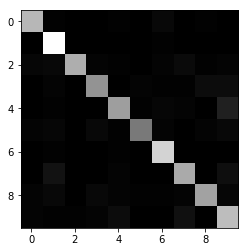

In [13]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
y_pred=cross_val_predict(grid_clf,X_train,y_train,cv=3)
cm=confusion_matrix(y_train,y_pred)
import matplotlib.pyplot as plt
%matplotlib inline
print(cm)
plt.imshow(cm,cmap=plt.cm.gray)

In [ ]:

from sklearn.model_selection import cross_val_score 
print(cross_val_score(knn_clf,X_train,y_train,cv=3))
print(cross_val_score(grid_clf,X_train,y_train,cv=3))


[0.82492582 0.84730539 0.85410334]
[0.83976261 0.85928144 0.86322188]


In [ ]:
y_test[5],y_test[6]

(1, 6)

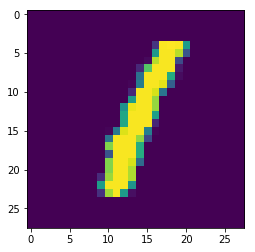

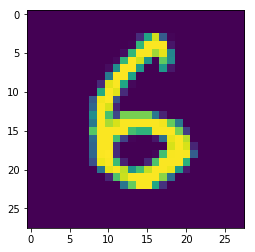

In [ ]:
plt.imshow(X_test[5].reshape(28,28))
plt.show()
plt.imshow(X_test[6].reshape(28,28))
plt.show()

In [ ]:
y_test_pred=grid_clf.predict(X_test)
cm_test=confusion_matrix(y_test,y_test_pred)
new_cm=(cm_test/cm_test.sum(axis=1,keepdims=True))
np.fill_diagonal(new_cm,0)
plt.imshow(cm_test,cmap=plt.cm.gray)
plt.show()
plt.imshow(new_cm,cmap=plt.cm.gray)
plt.show()
cm_test

In [ ]:
sum(y_test_pred==y_test)/len(y_test)

In [3]:
X_train,y_train

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]),
 array([4, 1, 9, 3, 9, 9, 6, 7, 0, 7, 4, 4, 3, 1, 5, 3, 3, 7, 5, 8, 5, 8,
        7, 8, 3, 2, 8, 3, 1, 3, 0, 7, 8, 5, 7, 2, 8, 1, 9, 9, 7, 5, 3, 8,
        1, 6, 8, 6, 8, 0, 4, 7, 3, 6, 9, 9, 7, 3, 8, 9, 5, 4, 7, 3, 9, 3,
        2, 2, 3, 4, 8, 6, 3, 8, 9, 0, 2, 9, 0, 5, 8, 7, 9, 1, 9, 8, 4, 7,
        6, 8, 5, 1, 1, 4, 0, 6, 9, 5, 9, 6, 3, 7, 7, 6, 4, 3, 3, 0, 0, 7,
        3, 7, 1, 7, 9, 3, 3, 3, 1, 5, 9, 0, 1, 3, 0, 1, 4, 9, 2, 6, 1, 7,
        7, 1, 1, 1, 9, 1, 0, 5, 6, 8, 1, 1, 5, 3, 8, 3, 7, 1, 7, 5, 4, 2,
        5, 1, 3, 1, 2, 1, 9, 1, 2, 9, 2, 8, 2, 1, 8, 2, 4, 4, 9, 5, 7, 9,
        7, 1, 2, 4, 7, 6, 4, 4, 4, 7, 0, 5, 2, 3, 4, 3, 3, 0, 4, 7, 7, 5,
        3, 2, 7, 5, 7, 9, 0, 5, 4, 0, 8, 1, 0, 0, 5, 0, 5, 4, 9, 8, 5, 8,
        7, 6, 3, 0, 6, 7, 3, 7, 6, 8, 2, 1, 1, 

In [4]:
from sklearn.neighbors import KNeighborsClassifier
clf=KNeighborsClassifier()
clf.fit(X_train,y_train)
clf.predict(X_train)==y_train.sum()

array([4, 1, 3, 3, 9, 9, 6, 7, 0, 7, 9, 4, 3, 1, 5, 3, 3, 7, 5, 8, 5, 8,
       7, 4, 3, 2, 8, 3, 1, 3, 0, 7, 8, 5, 7, 2, 1, 1, 9, 9, 7, 5, 3, 0,
       1, 4, 8, 6, 8, 0, 4, 7, 3, 6, 9, 9, 7, 3, 5, 9, 5, 4, 7, 3, 9, 7,
       2, 2, 3, 9, 8, 6, 3, 5, 9, 0, 2, 9, 0, 5, 9, 7, 9, 1, 9, 8, 9, 7,
       6, 8, 5, 1, 1, 4, 0, 6, 9, 5, 9, 6, 3, 7, 9, 6, 4, 3, 3, 0, 0, 7,
       3, 7, 1, 7, 9, 3, 3, 3, 1, 3, 9, 0, 1, 3, 0, 1, 9, 7, 2, 6, 1, 7,
       7, 1, 1, 1, 9, 1, 0, 5, 6, 8, 1, 1, 5, 3, 8, 3, 7, 1, 7, 5, 4, 2,
       5, 1, 3, 1, 2, 1, 9, 1, 0, 9, 2, 9, 2, 1, 8, 2, 9, 4, 9, 5, 7, 9,
       7, 1, 2, 4, 7, 6, 1, 4, 4, 7, 0, 5, 2, 3, 4, 3, 3, 0, 4, 7, 7, 5,
       3, 2, 7, 5, 7, 9, 0, 5, 4, 0, 8, 1, 0, 0, 5, 0, 3, 4, 7, 8, 5, 1,
       7, 6, 3, 0, 6, 7, 3, 7, 6, 8, 2, 1, 1, 2, 5, 4, 2, 5, 6, 5, 4, 0,
       5, 3, 9, 9, 9, 7, 0, 3, 4, 6, 4, 5, 3, 6, 8, 5, 2, 7, 1, 4, 3, 8,
       7, 4, 8, 1, 6, 5, 1, 1, 9, 3, 0, 0, 9, 3, 4, 8, 5, 9, 5, 6, 3, 4,
       8, 0, 5, 2, 7, 9, 9, 5, 1, 6, 3, 1, 9, 2, 6,